In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)

# Convert the scaled data back into a DataFrame
df_market_data_scaled = pd.DataFrame(
    df_market_data_scaled,
    columns=df_market_data.columns,
    index=df_market_data.index
)

# Display the scaled DataFrame
df_market_data_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [6]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(
    df_market_data_scaled,
    columns=df_market_data.columns,
    index=df_market_data.index
)

# Copy the crypto names from the original DataFrame
df_scaled['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_scaled.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [ ]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=0)
    # 2. Fit the model to the data using `df_market_data_scaled`
    model.fit(df_market_data_scaled)
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)


In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head()


,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780


In [10]:
# Plot the Elbow curve
df_elbow.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    width=800,
    height=400
)


:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?
**Answer:** The best value for `k` is 4.


---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [11]:
# Initialize the K-Means model using the best value for k
best_k = 4
model = KMeans(n_clusters=best_k, random_state=0)


In [12]:
# Fit the K-Means model using the scaled DataFrame
model.fit(df_market_data_scaled)


c:\Users\Antho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values
print(clusters)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [14]:
# Create a copy of the scaled DataFrame
df_clusters = df_scaled.copy()

# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_clusters['Cluster'] = clusters

# Display the copy of the scaled DataFrame
df_clusters.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [15]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_scaled['Cluster'] = clusters

# Display the copy of the scaled DataFrame
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [16]:
df_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters"
)


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [18]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
df_market_data_pca = pca.fit_transform(df_market_data_scaled)

# View the scaled PCA data
df_market_data_pca[:5]


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [19]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?
The total explained variance of the three principal components can be calculated by summing the values in the `explained_variance` array.

**Answer:** The total explained variance of the three principal components is approximately 0.895 (0.3719856 + 0.34700813 + 0.17603793).


In [20]:
# Create a new DataFrame with the PCA data
df_pca = pd.DataFrame(
    df_market_data_pca,
    columns=["PC1", "PC2", "PC3"],
    index=df_market_data.index
)

# Copy the crypto names from the original scaled DataFrame
df_pca['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_pca.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [21]:
k_values = list(range(1, 12))


In [ ]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model_pca = KMeans(n_clusters=k, random_state=0)
    # 2. Fit the model to the data using `df_market_data_pca`
    model_pca.fit(df_market_data_pca)
    # 3. Append the model.inertia_ to the inertia list
    inertia_pca.append(model_pca.inertia_)


In [23]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_values, "inertia": inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
df_elbow_pca.head()


,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314


In [24]:
# Plot the Elbow curve for the PCA data
df_elbow_pca.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve for PCA Data',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    width=800,
    height=400
)


:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for `k` when using the PCA data is 4, as indicated by the Elbow curve for the PCA data.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, the best value for `k` is the same (4) for both the original data and the PCA data.


### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [25]:
model_pca = KMeans(n_clusters=best_k, random_state=0)


In [26]:
# Fit the K-Means model using the PCA data
model_pca.fit(df_market_data_pca)


c:\Users\Antho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [27]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
clusters_pca = model_pca.predict(df_market_data_pca)

# Print the resulting array of cluster values
print(clusters_pca)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [28]:
# Create a copy of the scaled PCA DataFrame
df_clusters_pca = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_clusters_pca['Cluster'] = clusters_pca

# Display the copy of the scaled PCA DataFrame
df_clusters_pca.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [29]:
# Create a scatter plot using hvPlot
df_clusters_pca.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters (PCA)"
)


:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

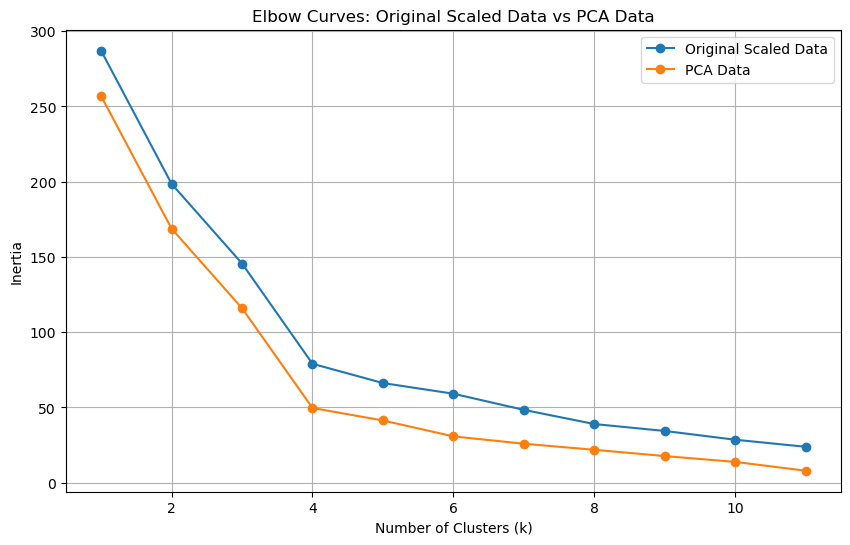

In [30]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt

# Plot the Elbow curve for the original scaled data
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, label="Original Scaled Data", marker='o')

# Plot the Elbow curve for the PCA data
plt.plot(k_values, inertia_pca, label="PCA Data", marker='o')

# Add labels, title, and legend
plt.title("Elbow Curves: Original Scaled Data vs PCA Data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.legend()
plt.grid(True)
plt.show()

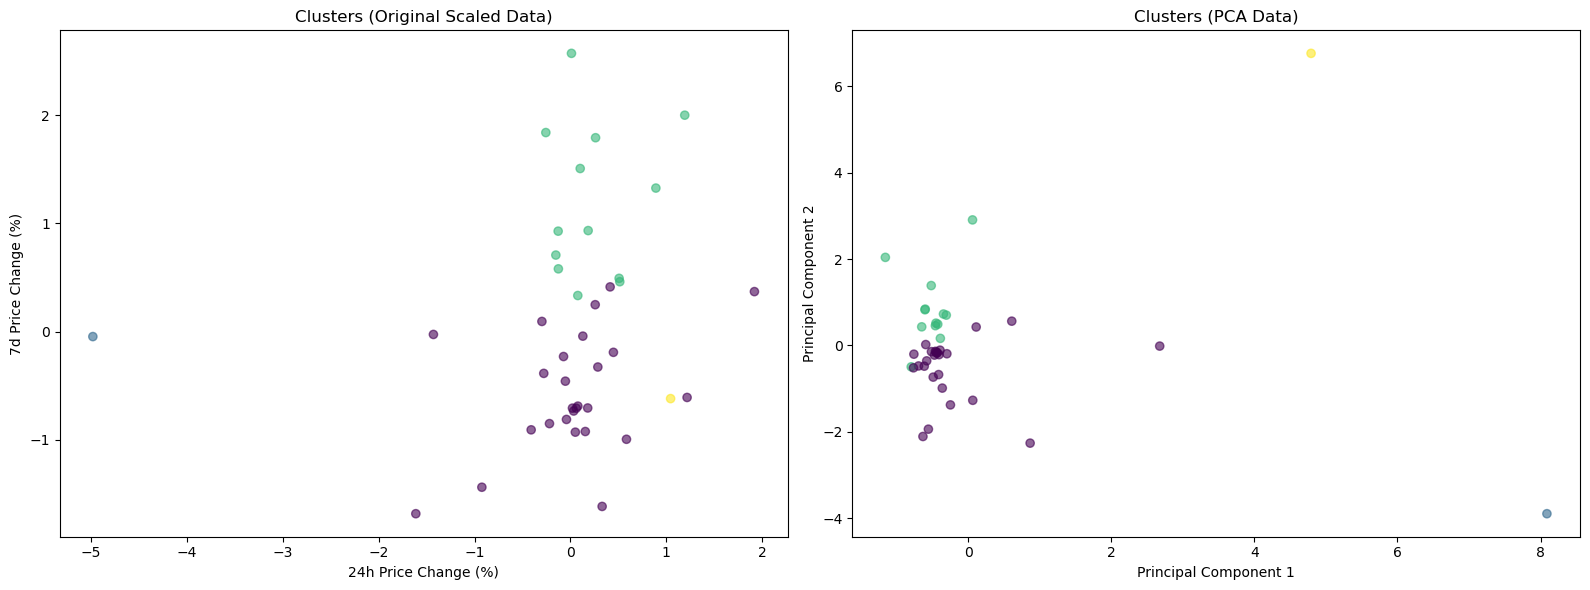

In [31]:
# Composite plot to contrast the clusters
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot for the original scaled data
axes[0].scatter(
    df_clusters['price_change_percentage_24h'],
    df_clusters['price_change_percentage_7d'],
    c=df_clusters['Cluster'],
    cmap='viridis',
    alpha=0.6
)
axes[0].set_title("Clusters (Original Scaled Data)")
axes[0].set_xlabel("24h Price Change (%)")
axes[0].set_ylabel("7d Price Change (%)")

# Scatter plot for the PCA data
axes[1].scatter(
    df_clusters_pca['PC1'],
    df_clusters_pca['PC2'],
    c=df_clusters_pca['Cluster'],
    cmap='viridis',
    alpha=0.6
)
axes[1].set_title("Clusters (PCA Data)")
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features with PCA reduces the dimensionality of the data, which simplifies the clustering process and can lead to more distinct and well-separated clusters. However, it may also result in the loss of some information, potentially impacting the granularity of the clustering results.